## Unsupervised learning 

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.utils import shuffle 
from sklearn.datasets import load_sample_image
from sklearn.cluster import KMeans

### Clustering
- color quantilization with k-means clustering 
- reduces the number of colors within an image while retaining the integrity of the image 

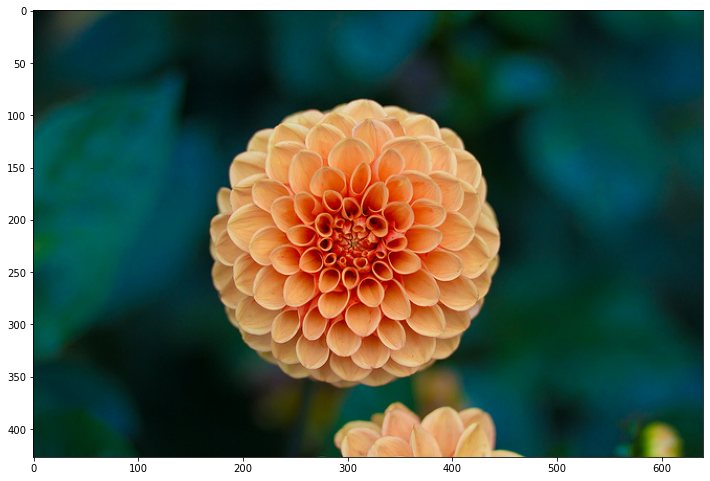

In [3]:
flower = load_sample_image('flower.jpg')

flower = np.array(flower, dtype = np.float64) / 255 

plt.figure(figsize=(12,12))
plt.imshow(flower)

normalize the data by converting to float and divide by 255 since colors are expressed as RGB 

In [4]:
w, h, d = original_shape = tuple(flower.shape)

assert d == 3 
# RGB 

image_array = np.reshape(flower, (w*h, d))

convert image to 2D matrix 
- RGB = 3 colors (red, green, or blue) 

In [ ]:
image_sample = shuffle(image_array, random_state=42)[:1000]
# take first 1000 samples 

# fit k means 
n_colors = 64
kmeans = KMeans(n_clusters=n_colors, random_state=42).fit(image_sample)

# get color indices for full image for reconstruction 
# labels are predictions from the kmeans 
labels = kmeans.predict(image_array)

reduce the colors to 64 using k-means where k is 64 

In [ ]:
def reconstruct_image(cluster_centers, labels, w, h): 
    d = cluster_centers.shape[1]
    # at index 1 
    image = np.zeros((w,h,d,))
    label_index = 0 
    for i in range(w): 
        for j in range(h): 
            image[i][j] = cluster_centers[labels[label_index]]
            label_index += 1 
    return image 

In [ ]:
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image with 96,615 colors')
plt.imshow(flower);

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title(f'Reconstructed image with {n_colors} colors')
plt.imshow(reconstruct_image(kmeans.cluster_centers_, labels, w, h))

rebuild the image
- each pixel is assigned to a cluster 
- each cluster is corresponds to a specific color  

- only the background is different; integrity remains 
    - decrease the colors and it wll be much more different 